<a href="https://colab.research.google.com/github/JencyCS/DataScience/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sheth L.U.J and Sir M.V. college

Jency Nadar T095

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [9]:
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')

print("FIRST 5 ROWS:\n", df.head())
print("\nCOLUMN INFO:\n")
print(df.info())
print("\nMISSING VALUES:\n")
print(df.isnull().sum())


FIRST 5 ROWS:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbay

In [10]:
# Convert ORDERDATE column to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Fill numeric missing values with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical missing values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop rows missing critical values
df.dropna(subset=['SALES'], inplace=True)

df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,Level 3,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,Level 3,Reims,CA,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,Level 3,Paris,CA,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,Level 3,Pasadena,CA,90003,USA,EMEA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,Level 3,San Francisco,CA,28034,USA,EMEA,Brown,Julie,Medium


Bar Plot

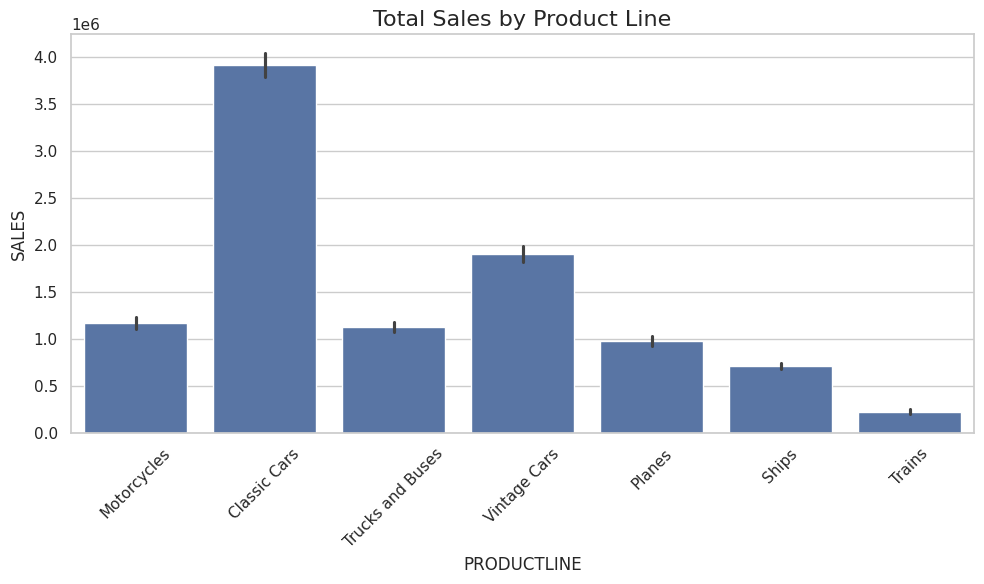

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x="PRODUCTLINE", y="SALES", data=df, estimator=sum)
plt.title("Total Sales by Product Line", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Box Plot

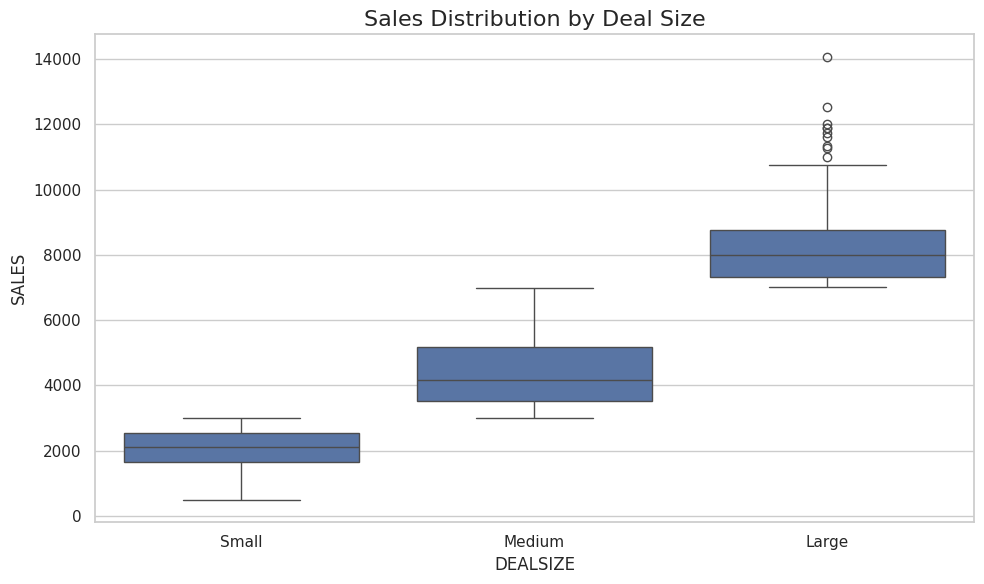

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="DEALSIZE", y="SALES", data=df)
plt.title("Sales Distribution by Deal Size", fontsize=16)
plt.tight_layout()
plt.show()


Line Plot

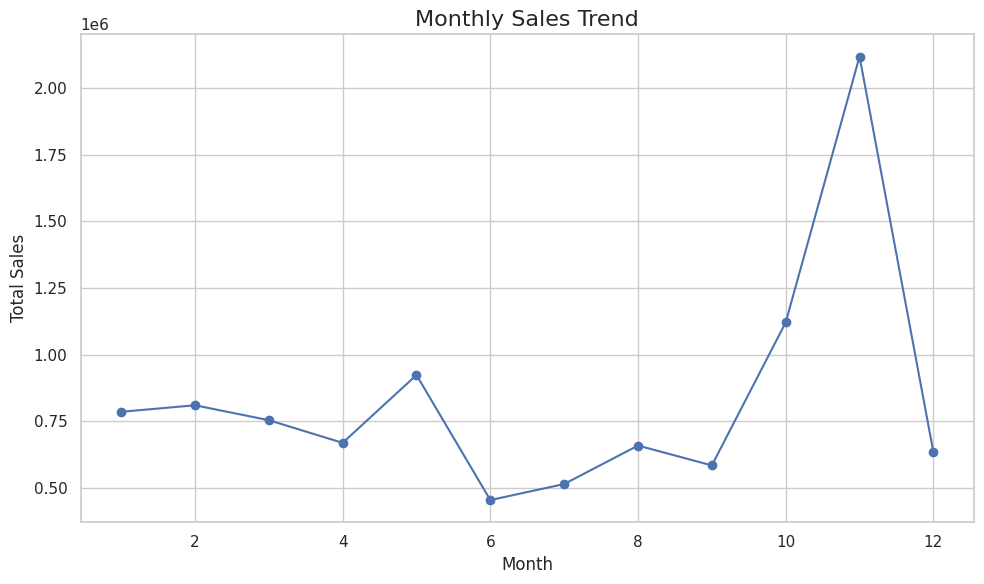

In [13]:
plt.figure(figsize=(10, 6))
df.groupby("MONTH_ID")["SALES"].sum().plot(kind="line", marker="o")
plt.title("Monthly Sales Trend", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


HEAP PLOT

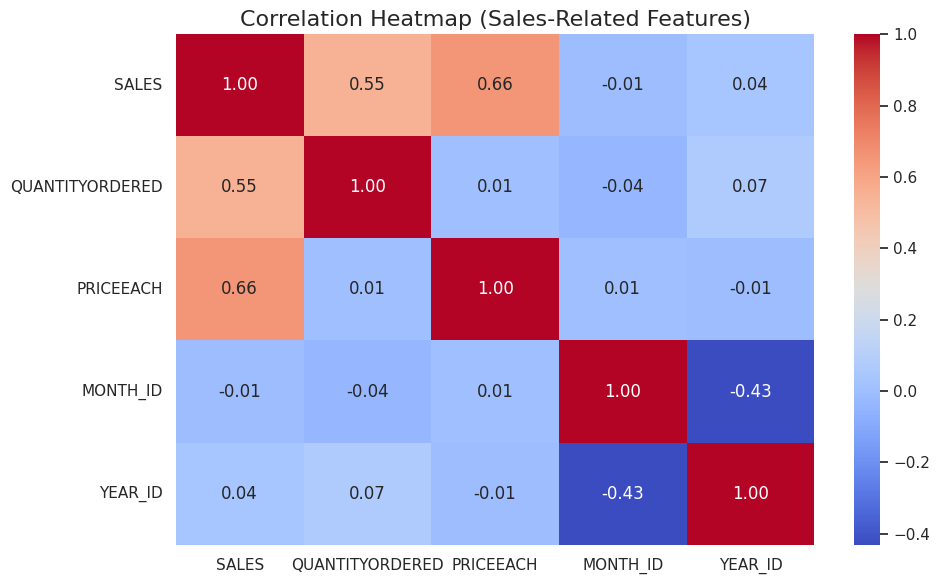

In [14]:
numeric_corr = df[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'MONTH_ID', 'YEAR_ID']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Sales-Related Features)", fontsize=16)
plt.tight_layout()
plt.show()


In [16]:
insights = {
    "Best Product Line": f"{df.groupby('PRODUCTLINE')['SALES'].sum().idxmax()} has the highest total sales.",
    "Deal Size Impact": "Large deal sizes tend to produce higher sales amounts.",
    "Monthly Trend": "Sales show clear seasonal patterns.",
    "Correlation": "Sales correlate positively with quantity ordered and unit price."
}

for key, value in insights.items():
    print(f"{key}: {value}\n")


Best Product Line: Classic Cars has the highest total sales.

Deal Size Impact: Large deal sizes tend to produce higher sales amounts.

Monthly Trend: Sales show clear seasonal patterns.

Correlation: Sales correlate positively with quantity ordered and unit price.



VILION PLOT

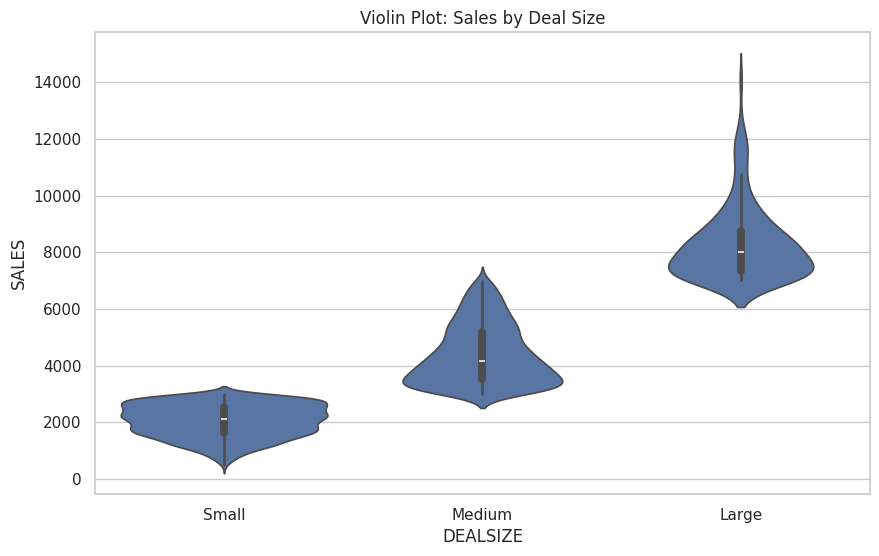

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="DEALSIZE", y="SALES", data=df)
plt.title("Violin Plot: Sales by Deal Size")
plt.show()


PAIR PLOT

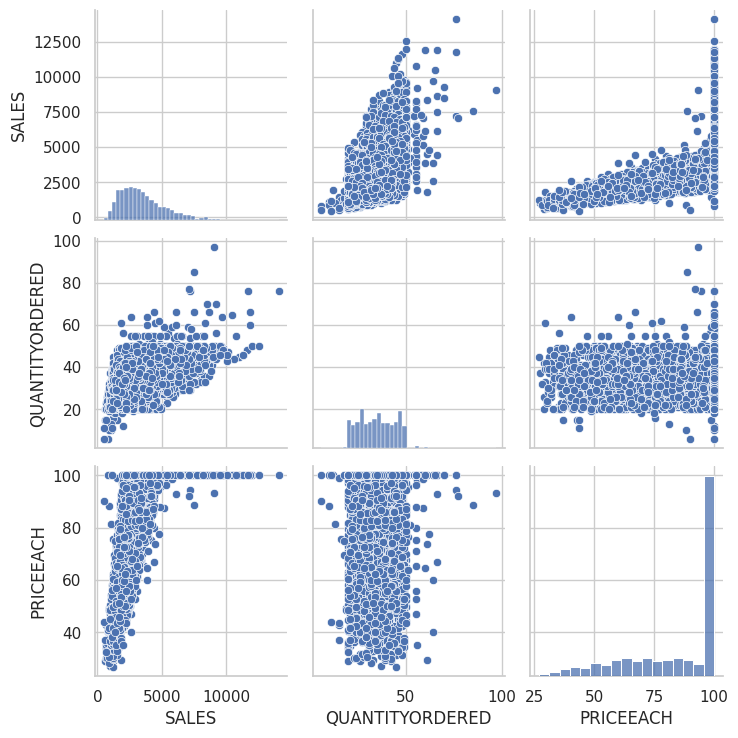

In [18]:
sns.pairplot(df[['SALES', 'QUANTITYORDERED', 'PRICEEACH']])
plt.show()


SCATTER PLOT

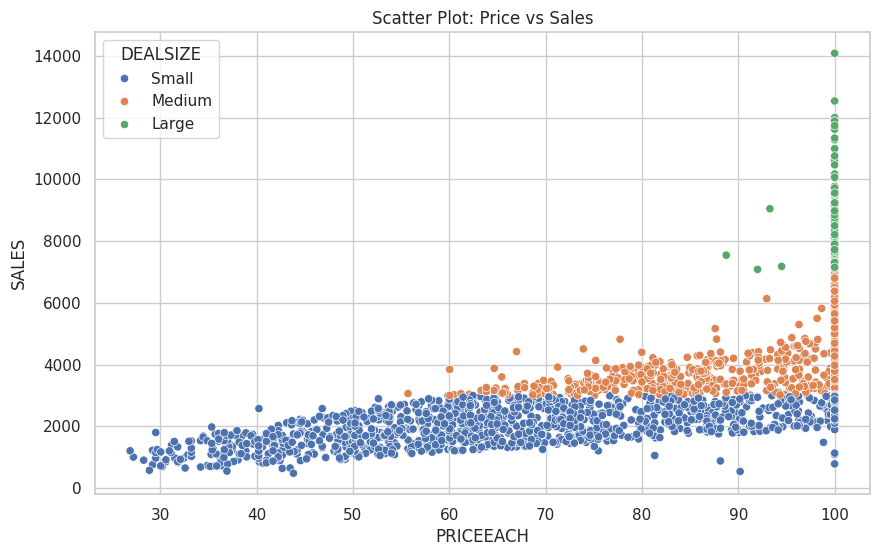

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PRICEEACH", y="SALES", hue="DEALSIZE", data=df)
plt.title("Scatter Plot: Price vs Sales")
plt.show()


DISTRIBUTION PLOT

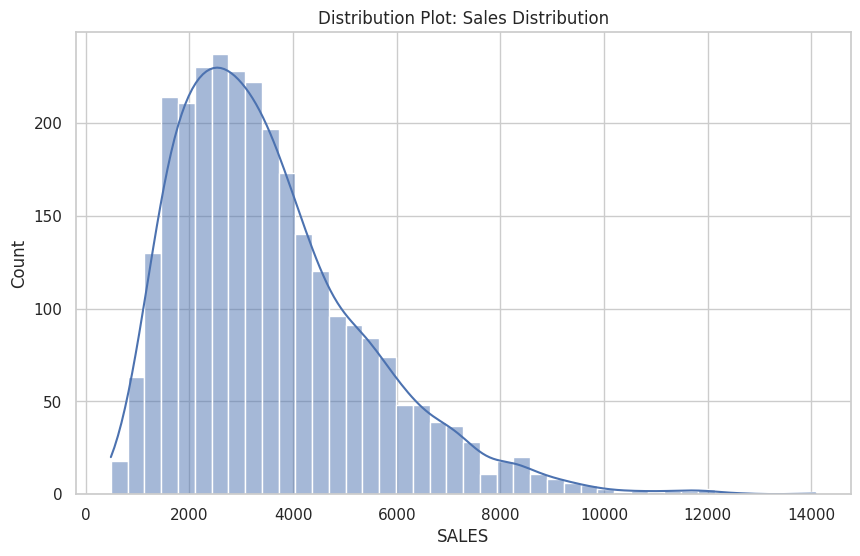

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df["SALES"], kde=True)
plt.title("Distribution Plot: Sales Distribution")
plt.show()


PIE CHART

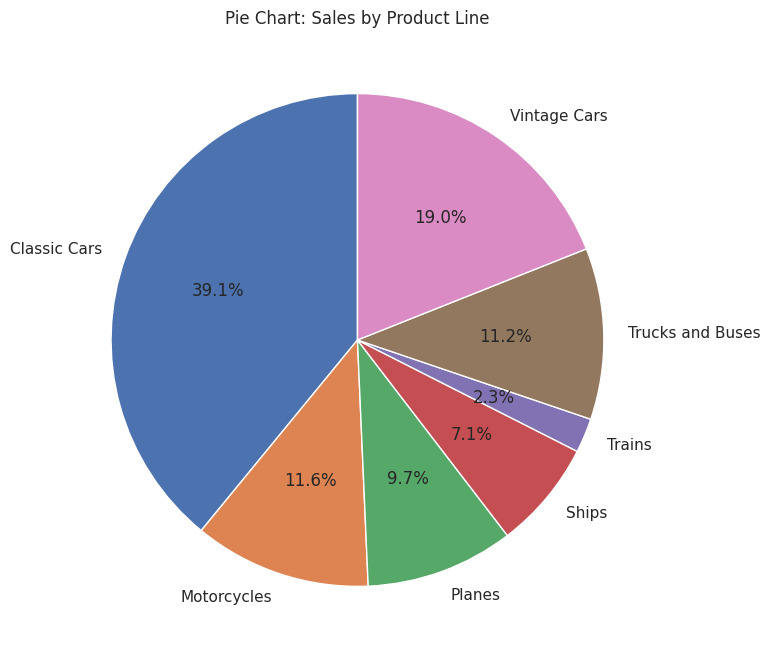

In [22]:
plt.figure(figsize=(8, 8))
df.groupby("PRODUCTLINE")["SALES"].sum().plot(
    kind="pie", autopct="%1.1f%%", startangle=90
)
plt.title("Pie Chart: Sales by Product Line")
plt.ylabel("")
plt.show()


HISTOGRAM

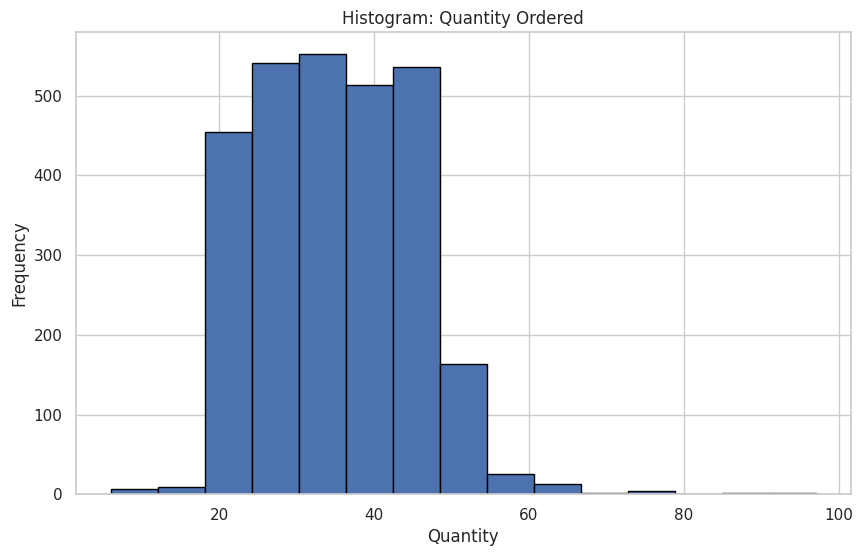

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df["QUANTITYORDERED"], bins=15, edgecolor="black")
plt.title("Histogram: Quantity Ordered")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()
